In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

In [94]:
df = pd.read_csv("NDVI_TimeSeries_MODIS (1).csv")
df

,date,NDVI
0,18-02-2000,0.357012
1,5/3/2000,0.367913
2,21-03-2000,0.380757
3,6/4/2000,0.355394
4,22-04-2000,0.332275
...,...,...
475,15-10-2020,0.432185
476,31-10-2020,0.401004
477,16-11-2020,0.319800
478,2/12/2020,0.393415


In [96]:
df['date'] = pd.to_datetime(df['date'], format='mixed', dayfirst=True)
df.set_index('date', inplace = True)
print(df.iloc[1])
print()
df

NDVI    0.367913
Name: 2000-03-05 00:00:00, dtype: float64



,NDVI
date,
2000-02-18,0.357012
2000-03-05,0.367913
2000-03-21,0.380757
2000-04-06,0.355394
2000-04-22,0.332275
...,...
2020-10-15,0.432185
2020-10-31,0.401004
2020-11-16,0.319800


In [98]:
ndvi_val = df.loc['2000-02-18']
print(ndvi_val)

NDVI    0.357012
Name: 2000-02-18 00:00:00, dtype: float64


In [100]:
data_2010 = df.loc['2010']
print(data_2010.head())


                NDVI
date                
2010-01-01  0.335536
2010-01-17  0.357667
2010-02-02  0.344072
2010-02-18  0.312738
2010-03-06  0.308300


In [102]:
summary = df.describe()
print(summary)


             NDVI
count  480.000000
mean     0.345496
std      0.044240
min      0.138755
25%      0.316745
50%      0.345142
75%      0.378796
max      0.444213


In [104]:
df['month'] = df.index.month
df['year'] = df.index.year
df['day_of_week'] = df.index.dayofweek

In [106]:
df['Lag1'] = df['NDVI'].shift(1)
df['Rolling_1'] = df['NDVI'].rolling(window=7).mean()
df['Expand_1'] = df['NDVI'].expanding().mean()

In [108]:
df

,NDVI,month,year,day_of_week,Lag1,Rolling_1,Expand_1
date,,,,,,,
2000-02-18,0.357012,2,2000,4,NaN,NaN,0.357012
2000-03-05,0.367913,3,2000,6,0.357012,NaN,0.362462
2000-03-21,0.380757,3,2000,1,0.367913,NaN,0.368561
2000-04-06,0.355394,4,2000,3,0.380757,NaN,0.365269
2000-04-22,0.332275,4,2000,5,0.355394,NaN,0.358670
...,...,...,...,...,...,...,...
2020-10-15,0.432185,10,2020,3,0.419678,0.390780,0.345314
2020-10-31,0.401004,10,2020,5,0.432185,0.393563,0.345431
2020-11-16,0.319800,11,2020,0,0.401004,0.383665,0.345377


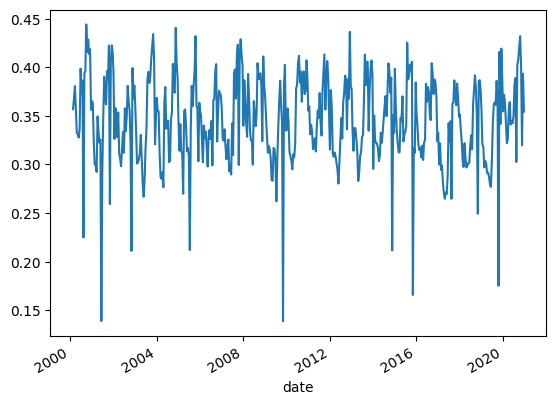

In [110]:
plt.figure()
df['NDVI'].plot()
plt.show()

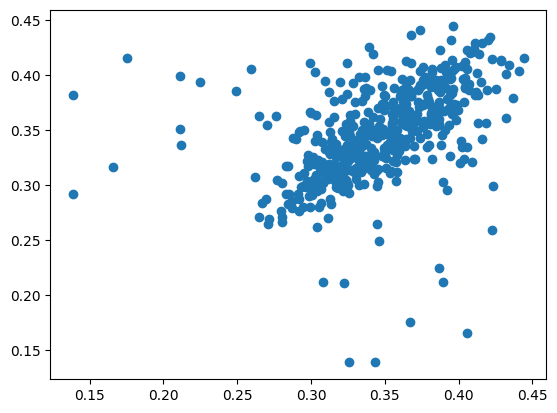

In [111]:
plt.figure()
plt.scatter(df['Lag1'],df['NDVI'])
plt.show()

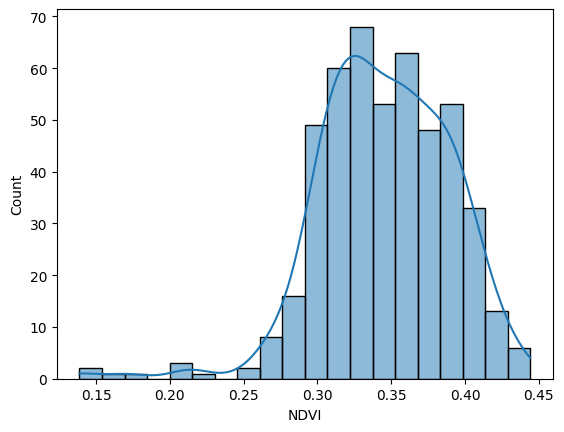

In [113]:
plt.figure()
sns.histplot(df['NDVI'], kde=True)
plt.show()

<Figure size 640x480 with 0 Axes>

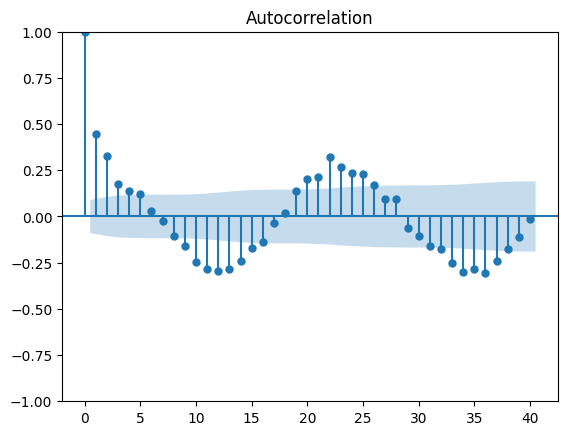

In [115]:
plt.figure()
plot_acf(df['NDVI'], lags=40)
plt.show()

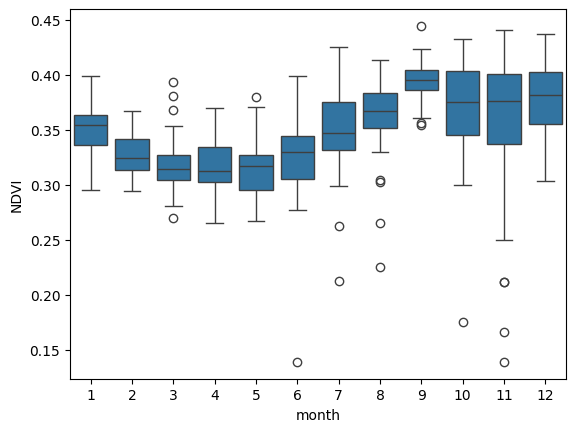

In [117]:
sns.boxplot(x='month',y='NDVI',data=df)
plt.show()

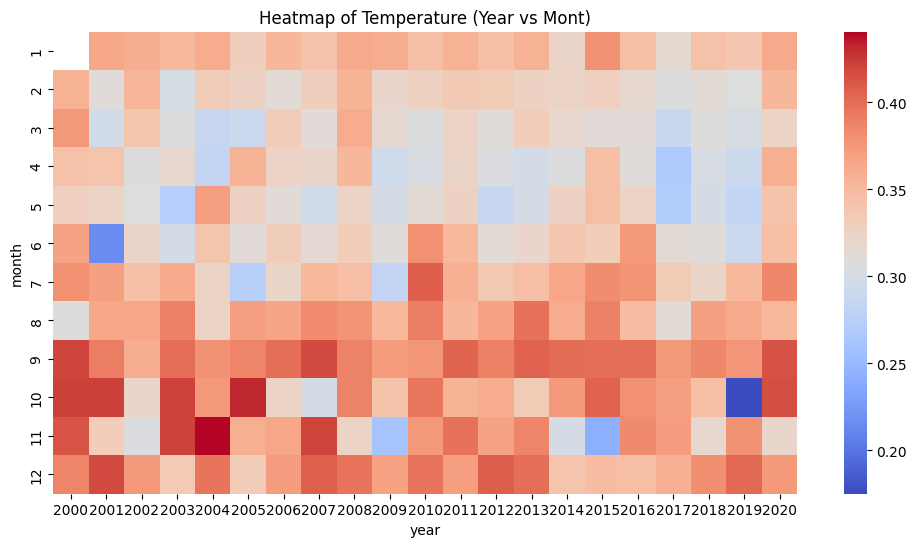

In [119]:
df['DayOfYear'] = df.index.dayofyear
pivot = df.pivot_table(index='month', columns='year', values='NDVI')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='coolwarm')
plt.title('Heatmap of Temperature (Year vs Mont)')
plt.show()


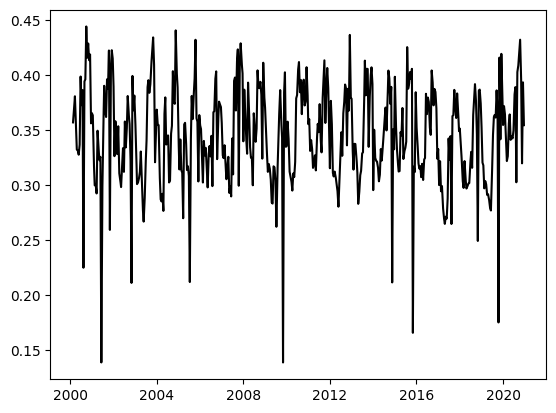

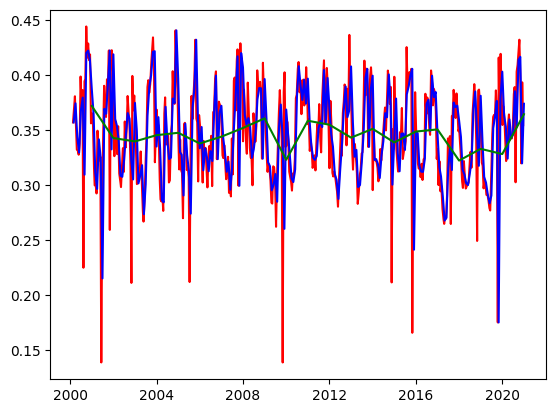

In [120]:
df_daily = df['NDVI'].resample('D').asfreq()

df_hourly = df['NDVI'].resample('h').asfreq()

interpolated_d = df_daily.interpolate(method='linear')

interpolated_h = df_hourly.interpolate(method='linear')

monthly_mean = df['NDVI'].resample('ME').mean()
annual_mean = df['NDVI'].resample('YE').mean()

plt.figure()
plt.plot(interpolated_d,color='black')

plt.figure()
plt.plot(interpolated_h,color='red')
plt.plot(monthly_mean,color='blue')
plt.plot(annual_mean,color='green')
plt.show()

In [122]:
result = adfuller(df['NDVI'])
result

(-5.400859639234169,
 3.373150403628012e-06,
 18,
 461,
 {'1%': -3.4446148284445153,
  '5%': -2.8678299626609314,
  '10%': -2.5701203107928157},
 -1709.2833724197212)

In [123]:
print(f'ADF Statistic : {result[0]}')
print()
print('If p-value < 0.05: Reject H0 → Stationarity achieved.')
print()
print('P-value : ',result[1])
print()
print('Critical Values: ', result[4])

ADF Statistic : -5.400859639234169

If p-value < 0.05: Reject H0 → Stationarity achieved.

P-value :  3.373150403628012e-06

Critical Values:  {'1%': -3.4446148284445153, '5%': -2.8678299626609314, '10%': -2.5701203107928157}


<Figure size 640x480 with 0 Axes>

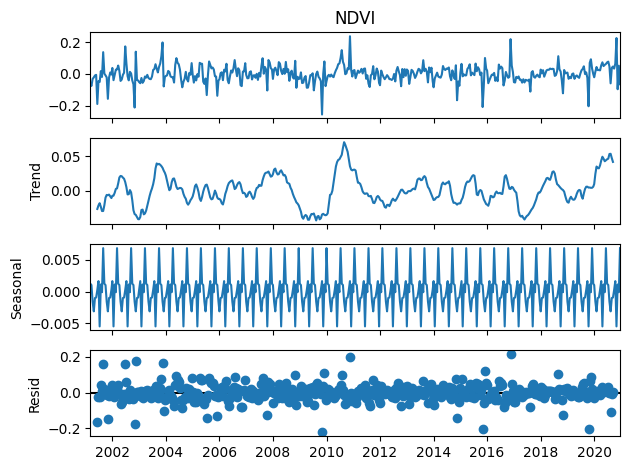

In [124]:
df_diff = df['NDVI'] - df['NDVI'].shift(24)
plt.figure()
decomposition = seasonal_decompose(df_diff.dropna(), period=12)  # Assuming yearly seasonality
decomposition.plot()
plt.show()

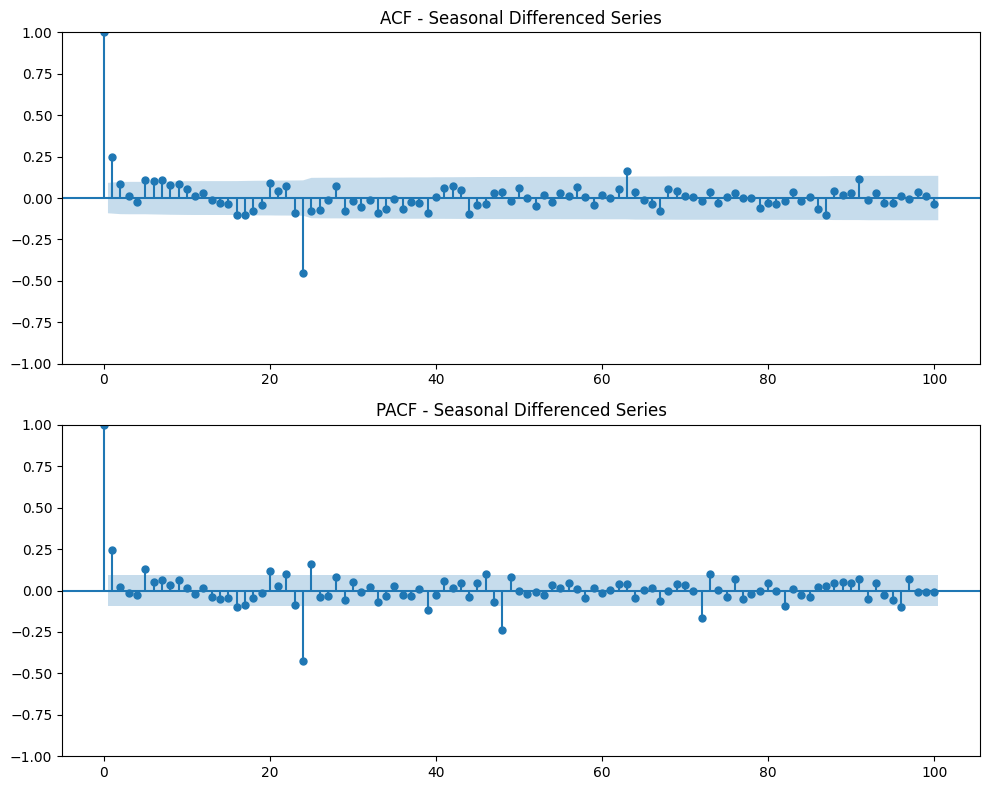

In [125]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assuming df['NDVI'] is your original series
# Use seasonal differencing
s = 24
df_seasonal_diff = df['NDVI'] - df['NDVI'].shift(s)
df_seasonal_diff = df_seasonal_diff.dropna()

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(df_seasonal_diff, lags=100, ax=ax[0])
ax[0].set_title("ACF - Seasonal Differenced Series")

plot_pacf(df_seasonal_diff, lags=100, ax=ax[1])
ax[1].set_title("PACF - Seasonal Differenced Series")

plt.tight_layout()
plt.show()


In [127]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_diff.dropna())  # drop NaNs from differencing

print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -7.927331502373845
p-value: 3.5894667339220393e-12


In [128]:
if result[1] > 0.05:
    df['NDVI_diff'] = df['NDVI'].diff()
    result_diff = adfuller(df['NDVI_diff'])
    print(f'ADF Statistic : {result[0]}')
    print('P-value : ',result[1])
    print('Critical Values: ', result[4])

<Figure size 640x480 with 0 Axes>

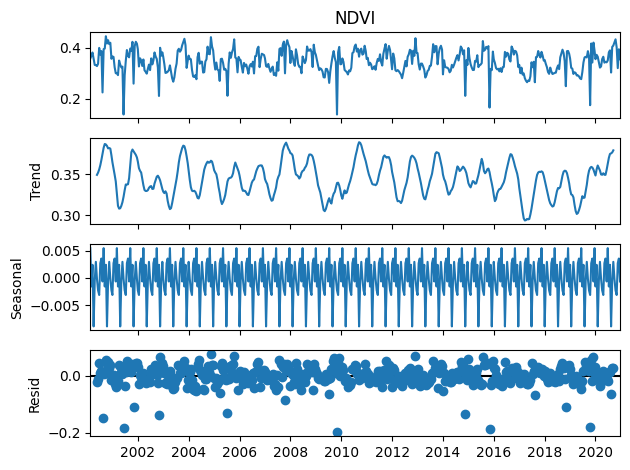

In [130]:
plt.figure()
decomposition = seasonal_decompose(df['NDVI'], period=12)  # Assuming yearly seasonality
decomposition.plot()
plt.show()

<Figure size 1200x400 with 0 Axes>

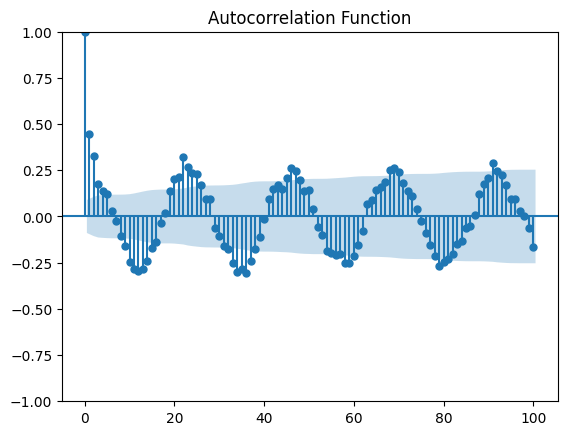

<Figure size 1200x400 with 0 Axes>

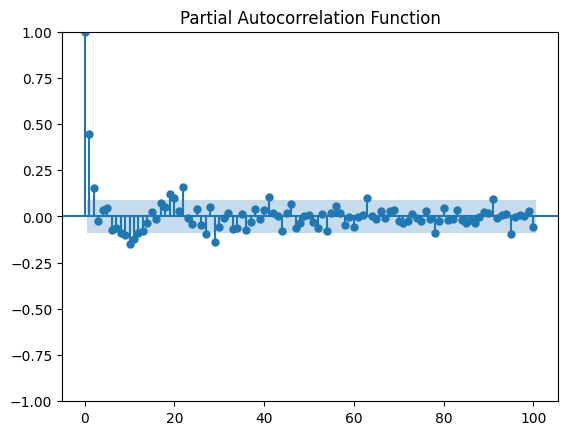

In [133]:
plt.figure(figsize=(12, 4))
plot_acf(df['NDVI'].dropna(), lags=100, title='Autocorrelation Function')
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(df['NDVI'].dropna(), lags=100, title='Partial Autocorrelation Function')
plt.show()

In [189]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df['NDVI'], order=(1,0,1), seasonal_order = (0,1,1,12))
result = model.fit()
result.summary()

C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               NDVI   No. Observations:                  480
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                 827.463
Date:                            Tue, 06 May 2025   AIC                          -1646.926
Time:                                    11:37:20   BIC                          -1630.333
Sample:                                         0   HQIC                         -1640.397
                                            - 480                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6683      0.071      9.352      0.000       0.528       0.808
ma.L1         -0.2750      0.079     -3.486      0.000      -0.430      -0.120
ma.S.L12      -0.9858      0.124     -7.948      0.000      -1.229      -0.743
sigma2         0.0016      0.000      9.568      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               569.95
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                            -0.95
Prob(H) (two-sided):                  0.93   Kurtosis:                         8.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


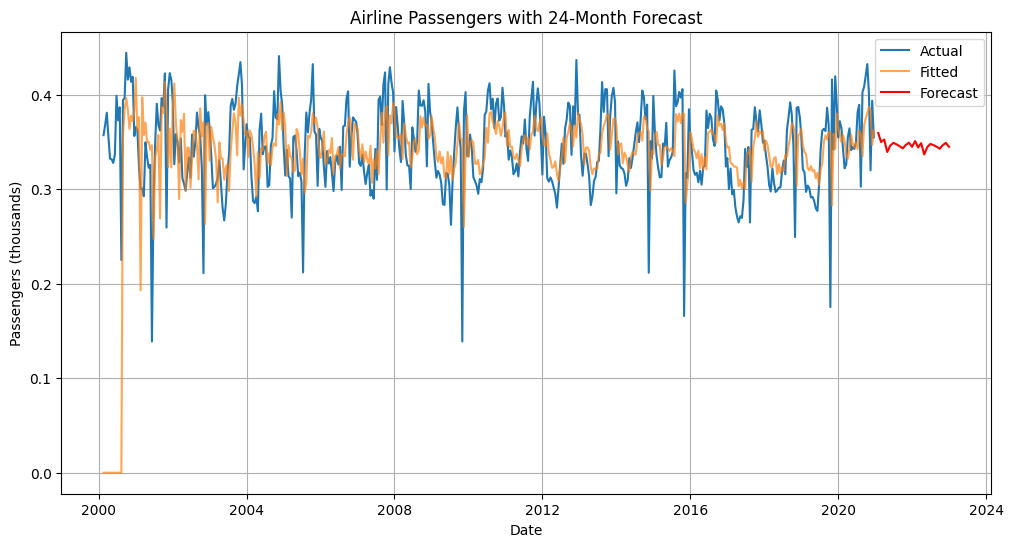

In [190]:
forecast_steps = 24
forecast = result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(df.index[-1], periods=forecast_steps+1, freq='ME')[1:]

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['NDVI'], label='Actual')
plt.plot(df.index, result.fittedvalues, label='Fitted', alpha=0.7)
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
plt.title('Airline Passengers with 24-Month Forecast')
plt.xlabel('Date')
plt.ylabel('Passengers (thousands)')
plt.legend()
plt.grid(True)
plt.show()

In [192]:
pred= result.fittedvalues
actual=df["NDVI"]
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae= mean_absolute_error(actual, pred)
mse= mean_squared_error(actual, pred)
rmse=np.sqrt(mse)
mape=np.mean(np.abs((actual-pred)/actual))*100

print("mean absolute error:",mae)
print("root mean square error:",rmse)
print("mean absolute percentage error:",mape)

mean absolute error: 0.03806660622183342
root mean square error: 0.06910790435293676
mean absolute percentage error: 11.829512500623961


In [194]:
model=ARIMA(df['NDVI'],order=(2,0,2))
model_fit=model.fit()
print(model_fit.summary())

C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   NDVI   No. Observations:                  480
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 875.795
Date:                Tue, 06 May 2025   AIC                          -1739.591
Time:                        11:37:20   BIC                          -1714.548
Sample:                             0   HQIC                         -1729.747
                                - 480                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3456      0.005     76.433      0.000       0.337       0.354
ar.L1          0.3375      0.885      0.381      0.703      -1.397       2.071
ar.L2          0.1541      0.639      0.241      0.8

C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


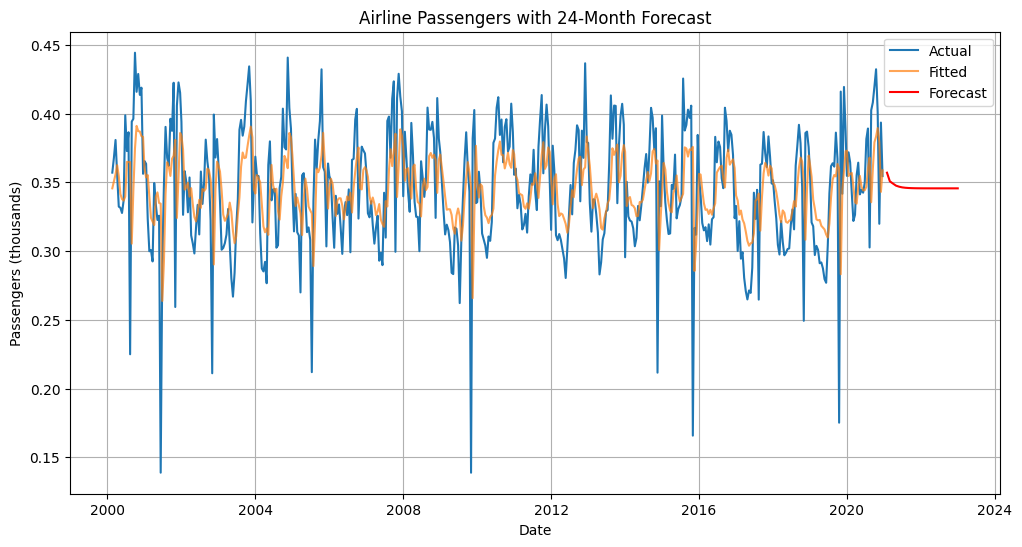

In [197]:
forecast_steps = 24
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(df.index[-1], periods=forecast_steps+1, freq='ME')[1:]

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['NDVI'], label='Actual')
plt.plot(df.index, model_fit.fittedvalues, label='Fitted', alpha=0.7)
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
plt.title('Airline Passengers with 24-Month Forecast')
plt.xlabel('Date')
plt.ylabel('Passengers (thousands)')
plt.legend()
plt.grid(True)
plt.show()

In [208]:
pred= model_fit.fittedvalues
actual=df["NDVI"]
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae= mean_absolute_error(actual, pred)
mse= mean_squared_error(actual, pred)
rmse=np.sqrt(mse)
mape=np.mean(np.abs((actual-pred)/actual))*100

print("mean absolute error:",mae)
print("root mean square error:",rmse)
print("mean absolute percentage error:",mape)

mean absolute error: 0.027816657953639023
root mean square error: 0.03901643092567251
mean absolute percentage error: 8.839289436939197
